Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


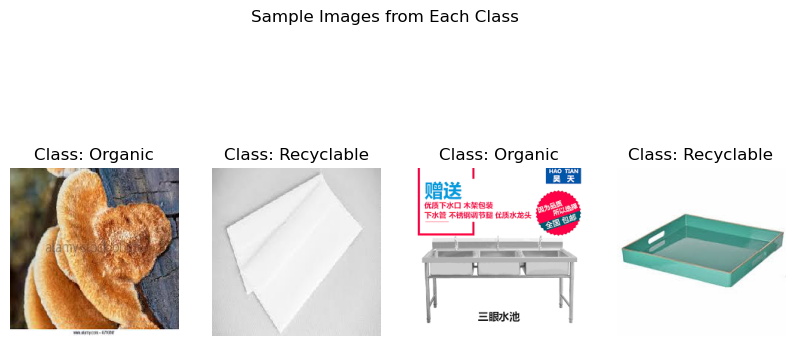

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up paths to the train and test directories
base_dir = r"C:\Users\jadit\OneDrive\Desktop\GreenSkillin\openCvDay5DataSet2\DATASET"
train_dir = base_dir + r"\Train"
test_dir = base_dir + r"\Test"

# Use ImageDataGenerator to prepare the data for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224), 
    batch_size=32,
    class_mode='binary'
)

# Display sample images from each class
plt.figure(figsize=(10, 5))
for i in range(4):  # Display 4 images (2 from each class if available)
    image, label = next(train_data)  # Use next() to get a batch of images
    plt.subplot(1, 4, i + 1)
    plt.imshow(image[0])  # Display the first image in the batch
    plt.title("Class: " + ("Organic" if label[0] == 0 else "Recyclable"))
    plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.show()

In [2]:
#include_top=False: Excludes the fully connected layers at the top of MobileNetV2
#weights='imagenet': Uses pre-trained weights from the ImageNet dataset
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freezes all the layers in the pre-trained MobileNetV2 to ensures that only the custom layers willlearn from new data
mobilenet_model.trainable = False  

# Add custom layers for classification
model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(), #reduces the spatial dimensions of single vector(summation of matrix)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# We start with a pre-trained MobileNet model, adding layers to classify waste images into O or R.

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [5]:
history=model.fit(
    train_data ,
    validation_data=test_data,
    epochs=3
)
model.save('mobilenet_model.h5')

Epoch 1/3
706/706 ━━━━━━━━━━━━━━━━━━━━ 554s 785ms/step - accuracy: 0.9261 - loss: 0.1925 - val_accuracy: 0.8739 - val_loss: 0.2894
Epoch 2/3
706/706 ━━━━━━━━━━━━━━━━━━━━ 399s 565ms/step - accuracy: 0.9372 - loss: 0.1655 - val_accuracy: 0.8631 - val_loss: 0.3093
Epoch 3/3
706/706 ━━━━━━━━━━━━━━━━━━━━ 381s 539ms/step - accuracy: 0.9422 - loss: 0.1505 - val_accuracy: 0.8754 - val_loss: 0.2980


In [6]:
loss, acc=model.evaluate(test_data)
print("Model accuracy ", acc)

79/79 ━━━━━━━━━━━━━━━━━━━━ 39s 492ms/step - accuracy: 0.8596 - loss: 0.3168
Model accuracy  0.875447690486908
